# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


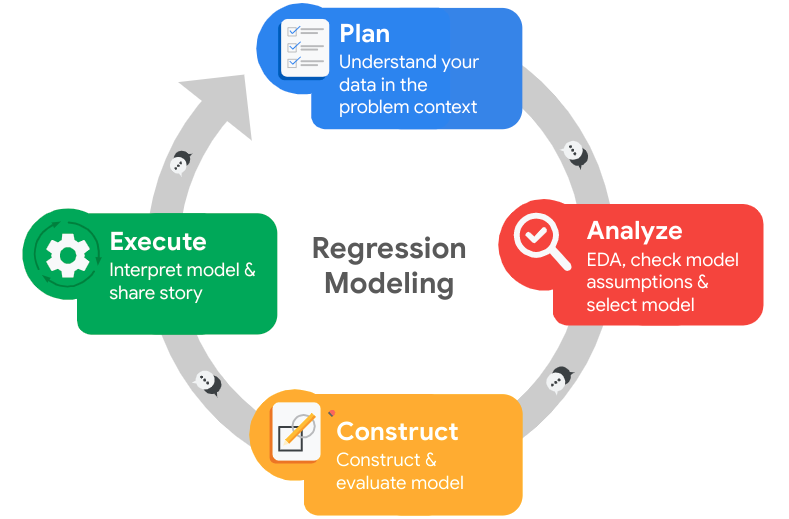

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**- Who are your stakeholders for this project?**

> -Stakeholders arre the HR mangement team._

**- What are you trying to solve or accomplish?**

> _Predict whether or not an employee will leave the company._

**- What are your initial observations when you explore the data?**



**- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**



**- Do you have any ethical considerations in this stage?**

> _False Negatives (FN). Employees predicted not to leave the company, but actually leave. Employees likely to leave aaren't flagged. Minimize these FN.
False Positive (FP). Employees who aren't planning to leave are predicted to leave the company._


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying all of the columns in dataframes
pd.set_option("display.max_columns", None)

# Metrics and helpful functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Data preparation
from sklearn.preprocessing import StandardScaler

# Data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {"Work_accident": "work_accident",
           "average_montly_hours": "average_monthly_hours",
           "time_spend_company": "tenure",
           "Department": "department"
           })

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

There are 3,008 duplicates or about 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


It is unlikely that the employees reported the same exact response for every column. Hence, drop these duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

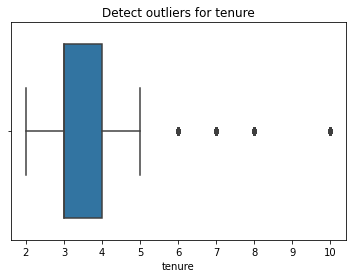

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data = df1, x = "tenure")
plt.title("Detect outliers for tenure")
plt.show();


There are  outliers in the `tenure` variable.

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df1["tenure"].quantile(0.25)
percentile75 = df1["tenure"].quantile(0.75)

iqr = percentile75 - percentile25

# The upper and lower limit for non-outliler values
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

print("Upper limit = ", upper_limit)
print("Lower limit = ", lower_limit)

outliers = df1[(df1["tenure"] > upper_limit) | (df1["tenure"] < lower_limit)]

print("Number of rows where tenure is an outlier", len(outliers))

Upper limit =  5.5
Lower limit =  1.5
Number of rows where tenure is an outlier 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1["left"].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1["left"].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


16.6% of all employees left.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

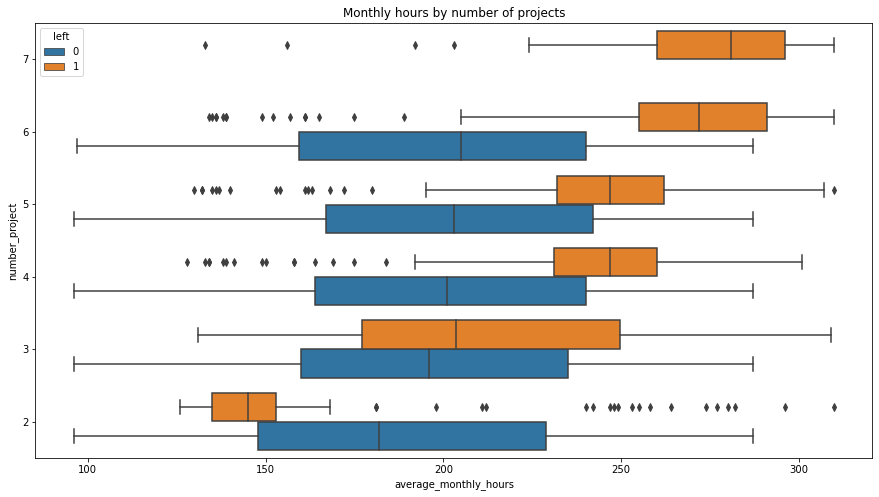

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, figsize = (15, 8))
sns.boxplot(data = df1, x = "average_monthly_hours", y = "number_project", hue = "left", orient = "h")
ax.invert_yaxis()
plt.title("Monthly hours by number of projects")
plt.show();

- There arer two groups of employees who left the company. Those who less hours than their peers (A) and those who work considerably more hours (B).
- It is plausible group A could have been fired, while group B quit.
- Employees with 7 projects worked between 250 and 300 hours = considerably more than anyone else.
- There is not much difference between employees who stayed/left when working on 3-4 projects.
- Working `50 weeks` a year at `40 hours` a week results in `50 * 40/12 = 166.7 hours a month`. Most employees are overworked.



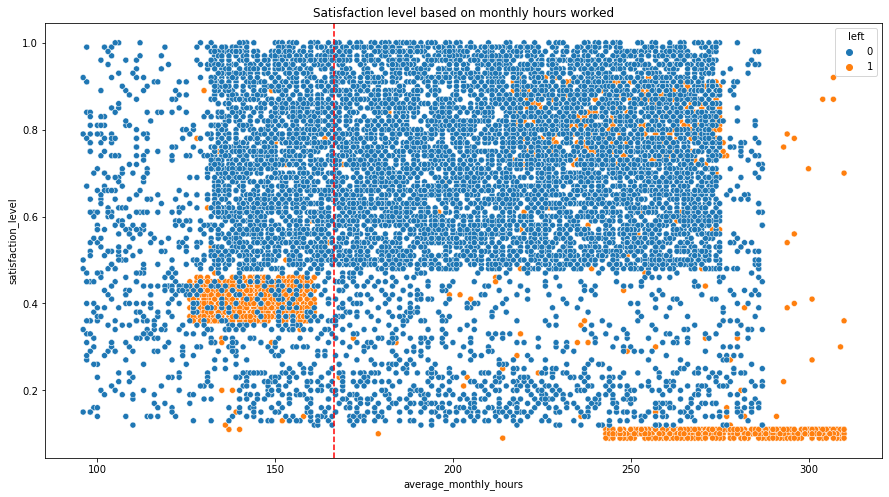

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df1, x = "average_monthly_hours", y = "satisfaction_level", hue = "left")
plt.axvline(x = 166.67, color = "#ff0000", label = "166.67 hrs/mo", ls = "--")
plt.title("Satisfaction level based on monthly hours worked")
plt.show();

Two groups of employees who left standout:
- Those with extreme hours 245-310 have satisfaction levels of less than 0.1. These are overworked and dissatisfied employees.
- Those who worked 125-160 hours had satisfaction levels of 0.375-0.425. These employees could have been fired.
- Those who worked between 180-210 hours/month with satisfaction levels 0.7-0.9. These are overworked, but satisfied emplyees. These employees could have been recruited to other companies.

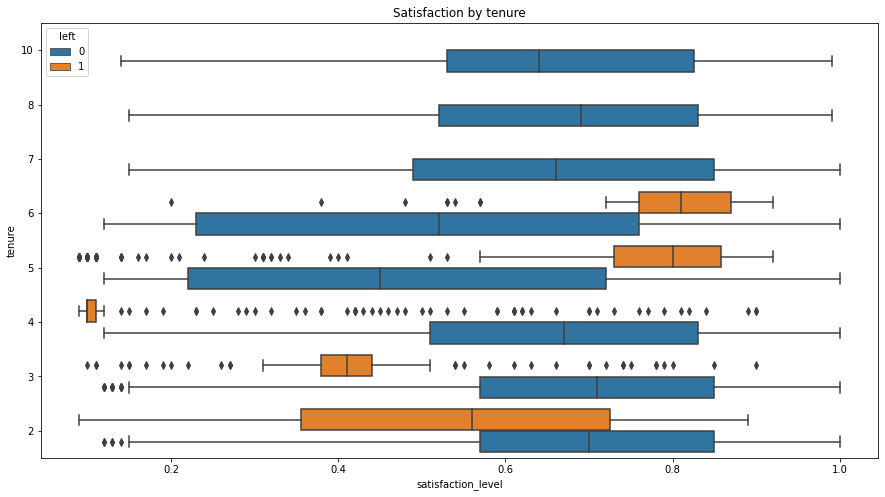

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, figsize = (15, 8))
sns.boxplot(data = df1, y = "tenure", x = "satisfaction_level", hue = "left", orient = "h")
ax.invert_yaxis()
plt.title("Satisfaction by tenure")
plt.show();

- Those who left with 3 years tenure had a satisfaction level of 0.375-0.425. Dissatisfied employees with shorter tenures.
- Those who left with 5-6 years tenure had satisfaction levels of 0.7-0.85. Satisfied employees with medium tenure.
- Those with 7 or more years tenure haven't left the company. Satisfied employees with longer tenure.

In [17]:
df1.groupby("left")["satisfaction_level"].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [38]:
(0.667365 - 0.440271)/0.440271

0.5158050382605258

On average those who stayed had a 52% higher satisfaction_level than those who left.

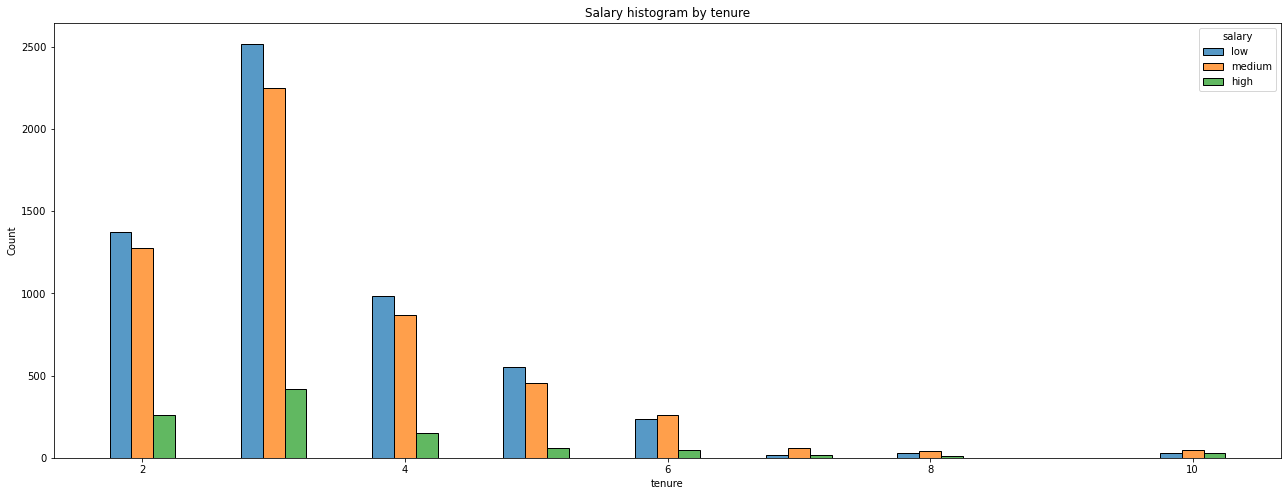

In [36]:
plt.figure(figsize = (22, 8))


sns.histplot(data = df1, x = "tenure", hue = "salary", hue_order = ["low", "medium", "high"], multiple = "dodge", discrete = 1,
            shrink = 0.5)
plt.title("Salary histogram by tenure")
# plt.legend(fontsize = 16)
plt.show()

Zoom in on tenure greater than 6 years

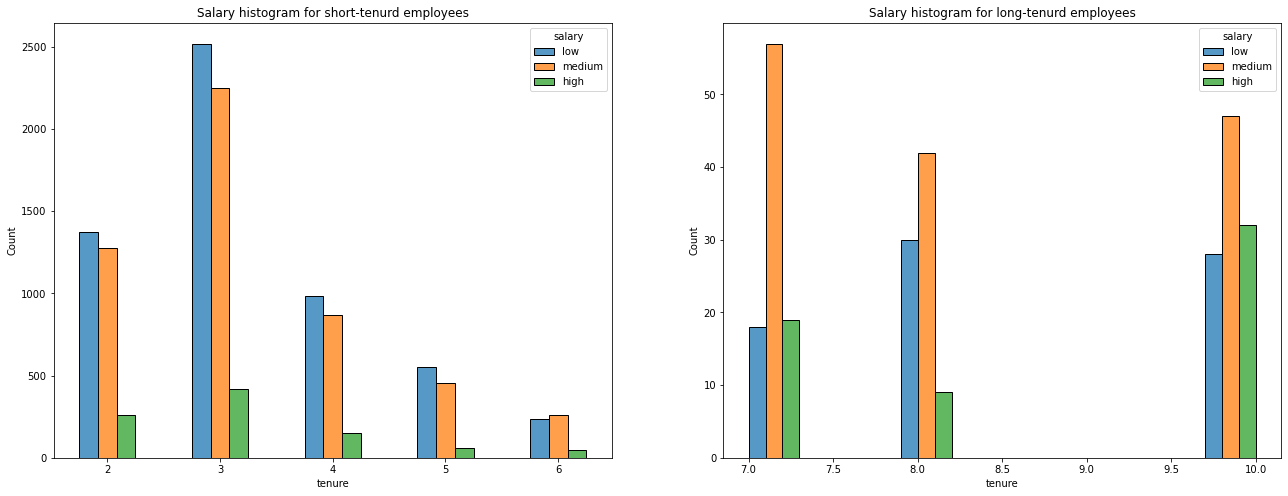

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Define short tenure employees
tenure_short = df1[df1["tenure"] < 7]

# Define long tenure employees
tenure_long = df1[df1["tenure"] > 6]

# Plot short-tenured histogram
sns.histplot(data = tenure_short, x = "tenure", hue = "salary", hue_order = ["low", "medium", "high"], multiple = "dodge",
            ax = ax[0], discrete = 1, shrink = 0.5)
ax[0].set_title("Salary histogram for short-tenurd employees")

# Plot long-tenured histogram
sns.histplot(data = tenure_long, x = "tenure", hue = "salary", hue_order = ["low", "medium", "high"], multiple = "dodge",
            ax = ax[1])
ax[1].set_title("Salary histogram for long-tenurd employees");

In [20]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Long tenure employees are not mainly high salaried.

In [21]:
# df_left = df1.copy()
df_emp = df1.groupby("department").size().reset_index(name = "no_of_employees")

df_left = df1.groupby("department")["left"].mean().reset_index(name = "perc_left")

df_median_hrs = df1.groupby("department")["average_monthly_hours"].mean().reset_index(name = "median_monthly_hrs")

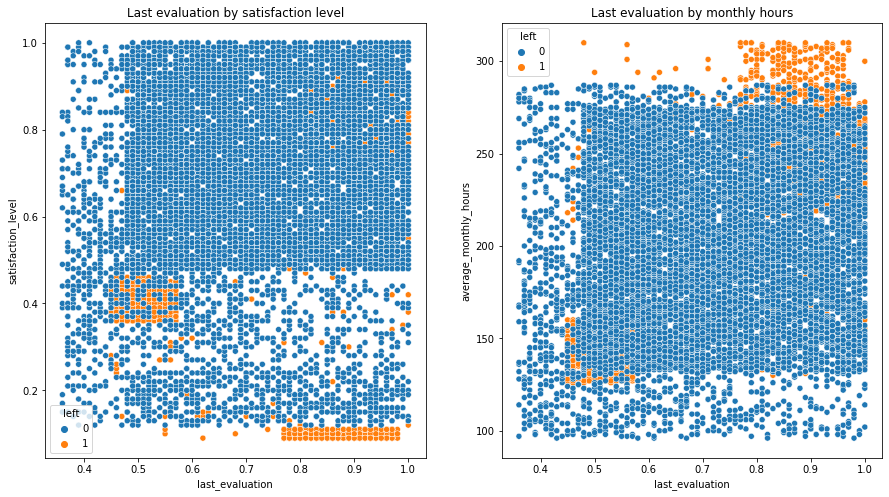

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (15, 8))


sns.scatterplot(data = df1, x = "last_evaluation", y = "satisfaction_level", hue = "left", ax = ax[0])

sns.scatterplot(data = df1, x = "last_evaluation", y = "average_monthly_hours", hue = "left", ax = ax[1]);

ax[0].set_title("Last evaluation by satisfaction level")
ax[1].set_title("Last evaluation by monthly hours")
plt.show()


Three groups of employees with satisfaction levels based on last evaluation score.
* One group of employees with high evaluation scores, but are very dissatisfied at work. These employees are likely to leave.
* A group of employees with low evaluation scores and low satisfaction levels. These employees are likely to have beeen fired.
* Another group of employees with > 0.75 evaluation scores and high satisfaction levels > 0.75 still left the company and could have been recruited to other positions.

Two main groups of employees with last evlauation score based on average monthly hours.
* Low evaluation scores with low monthly hours worked (between 130-160). These employees may have been fired.
* High evaluation scores with medium  and high monthly hours worked (> 225 hours). These employees could have rsigned due to overwork.

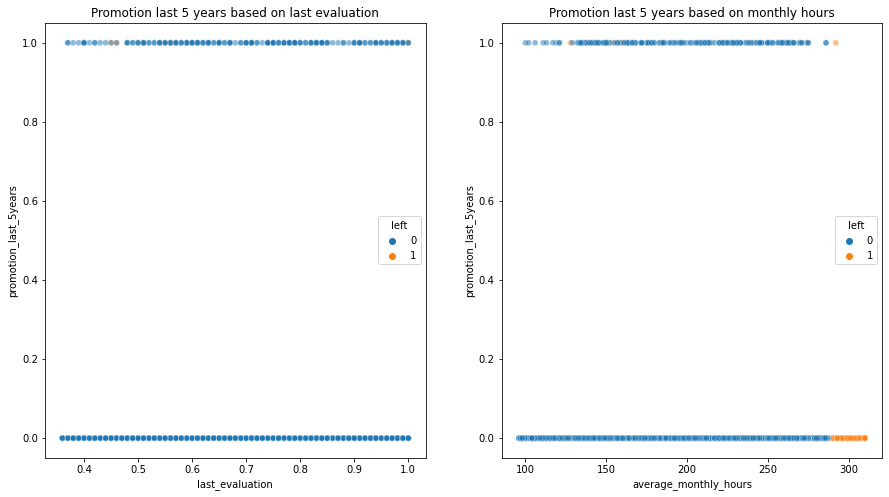

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (15, 8))


sns.scatterplot(data = df1, x = "last_evaluation", y = "promotion_last_5years", hue = "left",  alpha = 0.5,ax = ax[0])

sns.scatterplot(data = df1, x = "average_monthly_hours", y = "promotion_last_5years", hue = "left", alpha = 0.5, ax = ax[1]);

ax[0].set_title("Promotion last 5 years based on last evaluation")
ax[1].set_title("Promotion last 5 years based on monthly hours")
plt.show()


Dissatisfied wmployees who worked 300 hours and still weren't promoted in the last 5 years have left the company.

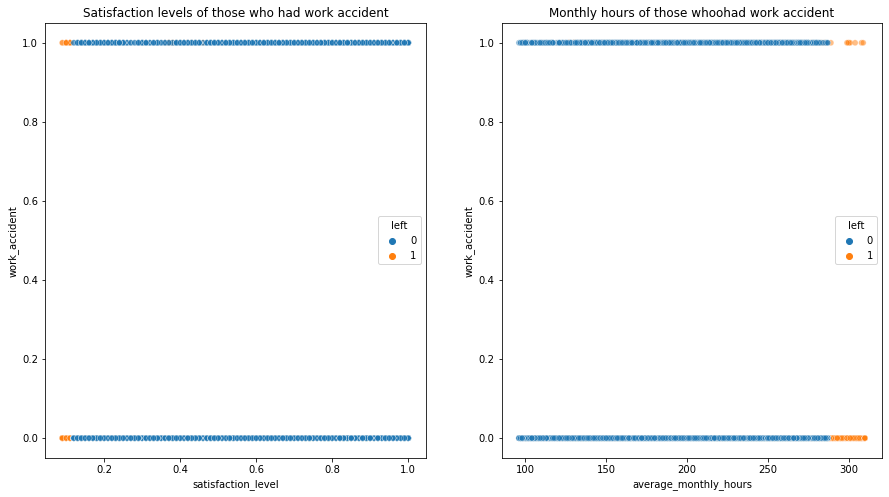

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (15, 8))


sns.scatterplot(data = df1, x = "satisfaction_level", y = "work_accident", hue = "left",  alpha = 0.5,ax = ax[0])

sns.scatterplot(data = df1, x = "average_monthly_hours", y = "work_accident", hue = "left", alpha = 0.5, ax = ax[1]);

ax[0].set_title("Satisfaction levels of those who had work accident")
ax[1].set_title("Monthly hours of those whoohad work accident")
plt.show()

Those who had work accident and those who do not have both left the company, but both groups had low saatisfaction levels. So work accient might not be a driving force in determining who left the company.

Those who worked 300 hours left the company. Some had work accidents and some did not.

Text(0.5, 1.0, 'Correlation heatmap')

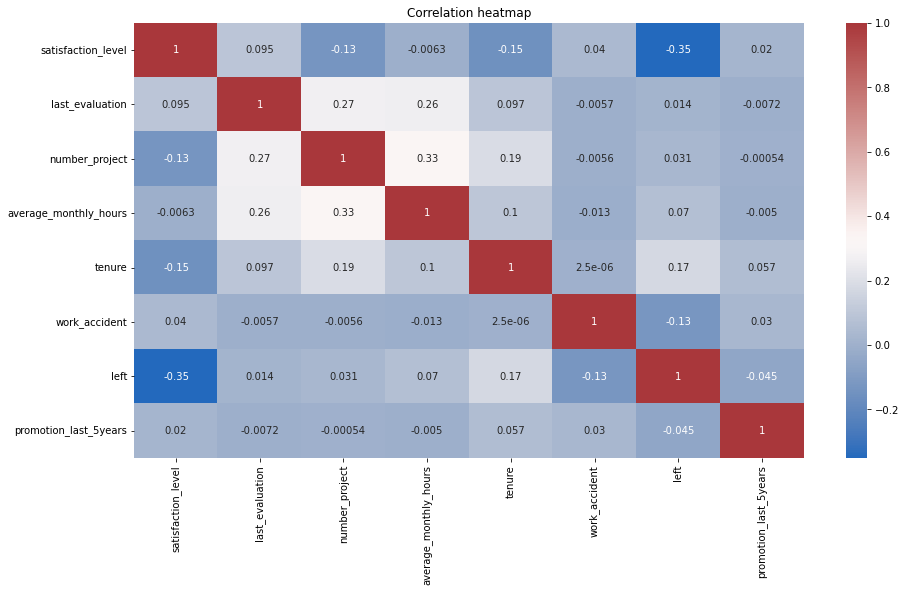

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###

# Plot a correlatio heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(data = df1.corr(), annot = True, cmap = sns.color_palette("vlag", as_cmap = True))
plt.title("Correlation heatmap")

Last evaluation, average monthly hours and number projects have a positive correlation. Satisfaction level and whether an employee leaves have a negative correlation.

### Insights

- Those who worked on more projects worked more monthly hours on average. 250 to almost 300 hours.
- A large portion of employees are overworked.
- Those with a long tenure remain at the company.
- Those with last evaluation being high still left the company.
- Dissatisfied wmployees who worked 300 hours and still weren't promoted in the last 5 years have left the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**2. Which independent variables did you choose for the model and why?**

- All variables except work accident. Work accident does not appear to be a dr iving force in determining those who left.

**3. Are each of the assumptions met?**

- There are outliers in the tenure variable.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company. Left is a categorical variable and this is therefore a classification task.

### Identify the types of models most appropriate for this task.

Logistic Regression, Decision Tree classifier, Random Forest classifier, XGBoost classifier.

### Modeling: Build Logistic Regression model

Add as many cells as you need to conduct the modeling process.

In [26]:
### YOUR CODE HERE ###

# Encode salary and department variables
df2 = df1.copy()
df2["salary"] = df2["salary"].astype("category").cat.set_categories(["low", "medium", "high"]).cat.codes

df2 = pd.get_dummies(df2, drop_first = True, columns = ["department"])

df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


Scale `average_monthly_hours` and tenure to be similar to other input variables.

In [73]:
# Remove outlieres in tenure column
df3 = df2[(df2["tenure"] >= lower_limit) & (df2["tenure"] <= upper_limit)]
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [74]:
# Create X and y variables

X = df3.drop("left", axis = 1)
y = df3["left"]

Split the data into training and testing sets.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

Construct a Logistic Regression model and fit the training data

In [76]:
# Construct Logistic Regression model
log_clf = LogisticRegression(random_state = 42, max_iter = 800)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Use model to make predictions on the test set.

In [77]:
# Make predictions on the test set

y_pred = log_clf.predict(X_test)

Create confusion matrix of logistic regression model

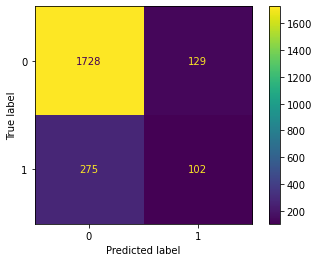

In [78]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_clf.classes_)

disp.plot(values_format = "")

plt.show()

- Upper left quadrant gives true negatives. True negatives (TN) - The number of people who did not leave that the model accurately predicted did not leave.
- Upper right quadrant gives false positives. False positives (FP) - The number of people who did not leave that the model inaccurately predicted as leaving.
- Lower left quadrant gives false negatives. False negatives (FN) - The number of people who left that the model inaccurately predicted did not leave.
- Lower right quadrant gives true positives. True positives (TP) - The number of people who left that the model accurately predicted as leaving.



Create classification report to get precision, recall, accuracy and F1 score.

In [71]:
# Create classification report

target_names = ["Did not leave", "Left"]
print(classification_report(y_test, y_pred, target_names = target_names))

               precision    recall  f1-score   support

Did not leave       0.86      0.93      0.90      1857
         Left       0.44      0.27      0.34       377

     accuracy                           0.82      2234
    macro avg       0.65      0.60      0.62      2234
 weighted avg       0.79      0.82      0.80      2234



It is more important to predict employees who left. Therefore precision = 44%, recall = 27%, accuracy = 82% and f1 score = 34%.

### Modeling: Build Tree-based model

Create input variables X and output variable y.

In [79]:
X = df2.drop("left", axis = 1)

y = df2["left"]

Split data into training and testing sets.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

Create random forest  model and Grid Search parameters.

In [81]:
rf = RandomForestClassifier(random_state = 42)

cv_params = {"max_depth": [2, 4, 6, None], 
             "max_features": [1.0],
             "max_samples": [0.7, 0.9, 1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4],
             "n_estimators": [200, 300, 500]
            }

scoring = {"precision", "recall", "accuracy", "f1", "roc_auc"}

rf1 = GridSearchCV(rf, cv_params, scoring, cv = 5, refit = "f1")


Fit the model to the training data.

In [82]:
%%time
rf1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

Best score achieved on the training set.

In [83]:
rf1.best_score_

0.9500332820412518

Best parameters resulting from the grid search.

In [84]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

Define path to save model.

In [85]:
path = "\home\joyvan\work"

In [86]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [87]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [88]:
 #write_pickle(path, rf1, "rfmodel")

In [ ]:
# rf1 = read_pickle(path, "rfmodel")

Get the scores from the model's prediction on the test set.

In [89]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [90]:
get_scores("RF CV test", rf1, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,RF CV test,0.985106,0.929719,0.956612,0.985991,0.963459


The scores using the random forest model are a vast improvement on the logistic regression model. F1 = 95%. For logistic regression model F1 = 34%

Plot a confusion matrix to see how random forest model performs on the test set.

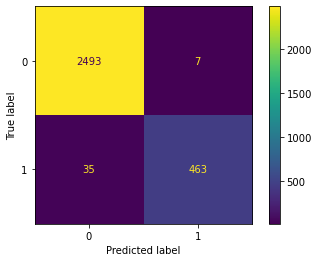

In [91]:
y_pred_rf = rf1.best_estimator_.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf, labels = rf1.classes_)

disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = rf1.classes_)

disp_rf.plot(values_format = "")
plt.show()

Identify feature importance for the random forest model.

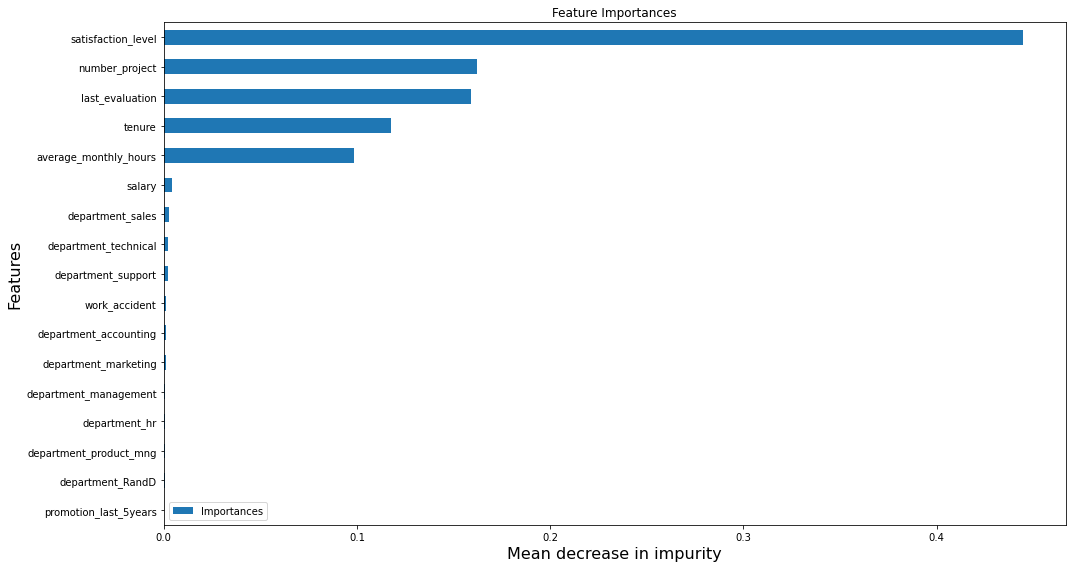

In [92]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.DataFrame({"Features": X_test.columns,
                              "Importances": importances})
rf_importances = rf_importances.sort_values("Importances", ascending = True)


fig, ax = plt.subplots(figsize = (15, 8))
rf_importances.plot(kind = "barh", ax = ax, x = "Features", y = "Importances")
ax.set_title("Feature Importances")
ax.set_xlabel("Mean decrease in impurity", fontsize = 16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout()

`satisfaction-level`, `number_project`, `last_evaluation`, `tenure`, `average_monthly_hours` are the most important features.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**1. What key insights emerged from your model(s)?**

- The logistic regression model performed poorly with an F1 score = 34%. The rendom forest model performed much better with a F1 score of 95.3%. The logistic regression also has precision = 44% and recall = 27%. The random forest model has precision = 97.8% and recall = 92.7%.

**2. What business recommendations do you propose based on the models built?**

- That the company look into overworked employees. These employees are working too many hours and are dissatisfied. Satisfaction levels are less than 0.1.
- Some employees could have been fired. These worked 125-160 hours and had satisfaction levels of 0.375-0.425. These employees could have deliberately slacked off in the number of hours workd due to high stress levels.
- Those who worked between 180-210 hours/month with satisfaction levels 0.7-0.9. These are overworked, but satisfied emplyees. These employees could have been recruited to other companies.

The more projects an employee works on the more likely they are to be overworked.
- Employees with 7 projects worked between 250 and 300 hours are overworked and left the company.
- There is not much difference between employees who stayed/left when working on 3-4 projects.


Evaluation scores
- One group of employees with high evaluation scores, but are very dissatisfied at work. These employees are likely to leave.
- A group of employees with low evaluation scores and low satisfaction levels. These employees are likely to have beeen fired.
- Another group of employees with > 0.75 evaluation scores and high satisfaction levels > 0.75 still left the company and could have been recruited to other positions.


**3. What potential recommendations would you make to your manager/company?**

- Monitor employee working hours to make sure they are not overworked.
- Monitor employees with low satisfaction levels and find o ut the rerasons why to prevent turnover.
- Make sure that low evaluation scores is not a case of dissatisfied employees slacking off.

**4. Do you think your model could be improved? Why or why not? How?**

- Yes. The model can be improved by including only those variables that are important.

**7. Do you have any ethical considerations in this stage?**

- No.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic rergression model**

This model had precision = 44%, recall = 27%, and F1 score = 34%.

**Random forest model**

Random forest model had precision = 98.5%, recall = 93.0%, and F1 score = 95.6%.

### Conclusion, Recommendations, Next Steps

- Establish a policy where employees work reasonable hours to prevent them from becoming  overworked burnout.
- Ensure employees work 3-4 projects at a time instead of 7.
- Create an overtime with pay      policy, so employees are compensated for their time.  Make sure the hours are limited, so employees don't become overworked.
- Implement a survey to find out why employees are satisfied or why they are not.
- Instead of predicting who is likely to leave, predict satisfaction level of employees.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.